In [182]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')
titanic_train_test = [titanic_train, titanic_test]

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
titanic_train.info()
print ()
print ("Missing values:")
print (titanic_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [185]:
titanic_test.info()
print ()
print ("Missing values:")
print (titanic_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

Missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### -----
+ a lot of data missing in the 'Cabin' feature: 1014 from 1309 (consider get rid of the feature)


In [186]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


----------
# Discover and Visualize the Data to Gain Insights

#### Looking for correlation (Pearson's correlation)

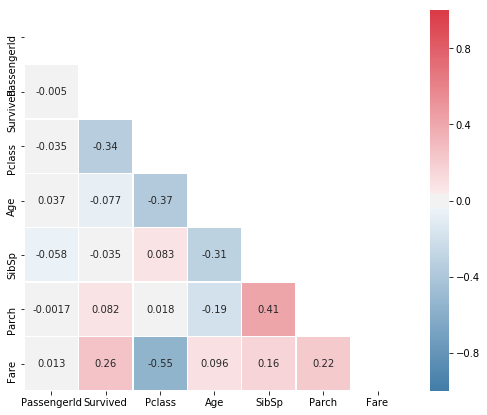

In [188]:
corr = titanic_train.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
# (https://matplotlib.org/examples/color/colormaps_reference.html)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, square=True, cmap=cmap, vmin = -1, center = 0, linewidths=.5)

In [189]:
#from matplotlib import cm
#cmap = cm.get_cmap("gnuplot")
#scatter = pd.plotting.scatter_matrix(titanic_train[['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived']], c=titanic_train['Survived'], marker='o', hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)

---

#### Men vs women
+ Women were more likely to survive?
    * 74.2% of women and 18.9% of men survived

In [190]:
titanic_train[['Survived', 'Sex']].groupby(['Sex']).agg(['count','sum','mean'])

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

----
#### 1st vs 2nd vs 3rd class
+ 1st class passengers were more likely to survive
+ Women in 1st and 2nd classes were almost twice more likely to survive
    - 96.8, 92.1 and 50% of female passengers in 1, 2 and 3 class survived, respectively
+ Men in 1st class were more than twice more likely to survive
    - 36.8, 15.7 and 13.5% of male passengers in 1, 2 and 3 class survived, respectively

In [191]:
titanic_train[['Survived', 'Pclass', 'Sex']].groupby(['Sex', 'Pclass']).agg(['count','sum','mean'])

Survived              
                 count sum      mean
Sex    Pclass                       
female 1            94  91  0.968085
       2            76  70  0.921053
       3           144  72  0.500000
male   1           122  45  0.368852
       2           108  17  0.157407
       3           347  47  0.135447

---
#### Embarked place
+ Maybe the embarked local is related to the cabin position (for each class) on ship, as it seems that it has some relation to survival?
* For exemple, it seems that the 3rd class passengers that embarked in C or Q were twice more likely to survive than S.

In [192]:
titanic_train[['Survived', 'Pclass', 'Embarked']].groupby(['Pclass', 'Embarked']).agg(['count','sum','mean'])

Survived              
                   count sum      mean
Pclass Embarked                       
1      C              85  59  0.694118
       Q               2   1  0.500000
       S             127  74  0.582677
2      C              17   9  0.529412
       Q               3   2  0.666667
       S             164  76  0.463415
3      C              66  25  0.378788
       Q              72  27  0.375000
       S             353  67  0.189802

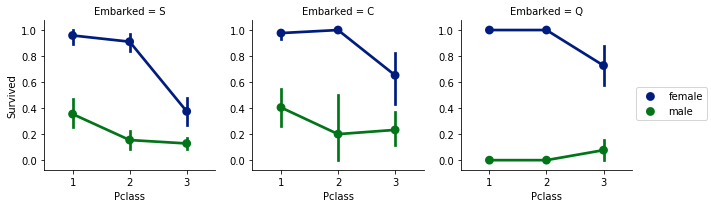

In [193]:
grid = sns.FacetGrid(titanic_train, col='Embarked')
#grid = sns.FacetGrid(titanic_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='dark', hue_order=["female", "male"])
grid.add_legend()

-----
#### Age
+ Children <6 were more likely to survive
+ Men between 24 and 32 were more likely to survive
+ Adults >40 on 3rd class were less likely to survive
+ Adults >65 were less likely to survive

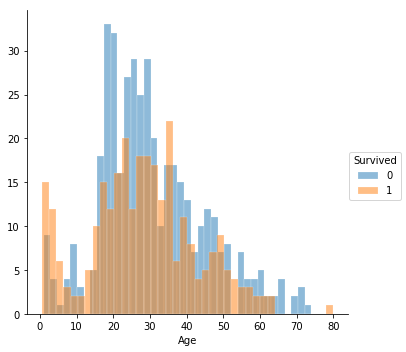

In [194]:
grid = sns.FacetGrid(titanic_train, size = 5, aspect=1, hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, linewidth=0.4, edgecolor="white", bins=40)
grid.add_legend()

(0, 98.148915881796199)

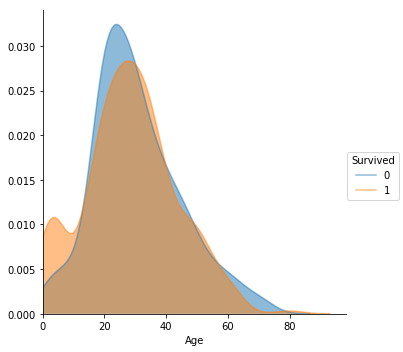

In [195]:
# another way of representing
grid = sns.FacetGrid(titanic_train, size=5, aspect=1, hue='Survived')
grid.map(sns.kdeplot, 'Age', alpha=.5, shade=True)
grid.add_legend()
grid.axes[0,0].set_xlim(0,)

----
#### Fare
+ Folloowing Pearson's correlation, the fare is linearly corrolated at some level to the passenger class
+ It seems that the higher the fare, the higher the chances of survival

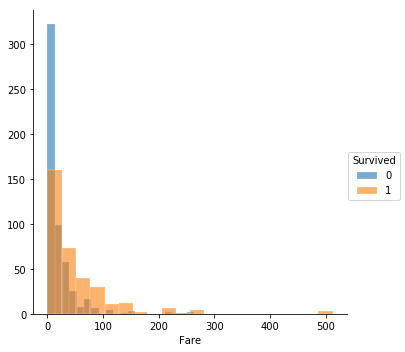

In [196]:
grid = sns.FacetGrid(titanic_train, size = 5, hue='Survived')
grid.map(plt.hist, 'Fare', alpha=.6, linewidth=0.4, edgecolor="white", bins=20)
grid.add_legend()

(0, 300)

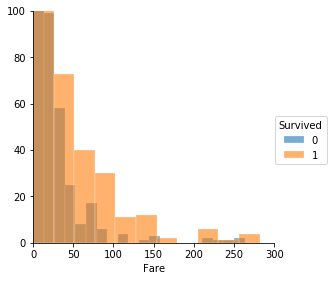

In [197]:
# zooming in
grid = sns.FacetGrid(titanic_train, size = 4, hue='Survived')
grid.map(plt.hist, 'Fare', alpha=.6, linewidth=0.4, edgecolor="white", bins=20)
grid.add_legend()
grid.axes[0,0].set_ylim(0,100)
grid.axes[0,0].set_xlim(0,300)

In [198]:
titanic_train[['Pclass', 'Embarked', 'Fare']].groupby(['Pclass', 'Embarked']).agg(['count', 'min', 'max', 'median', 'mean'])

Fare                                        
                count      min       max   median        mean
Pclass Embarked                                              
1      C           85  26.5500  512.3292  78.2667  104.718529
       Q            2  90.0000   90.0000  90.0000   90.000000
       S          127   0.0000  263.0000  52.0000   70.364862
2      C           17  12.0000   41.5792  24.0000   25.358335
       Q            3  12.3500   12.3500  12.3500   12.350000
       S          164   0.0000   73.5000  13.5000   20.327439
3      C           66   4.0125   22.3583   7.8958   11.214083
       Q           72   6.7500   29.1250   7.7500   11.183393
       S          353   0.0000   69.5500   8.0500   14.644083

In [199]:
titanic_train[['Pclass', 'Fare', 'Survived']].groupby(['Pclass', 'Survived']).agg(['count', 'min', 'max', 'median', 'mean'])

Fare                                       
                count      min       max   median       mean
Pclass Survived                                             
1      0           80   0.0000  263.0000  44.7500  64.684008
       1          136  25.9292  512.3292  77.9583  95.608029
2      0           97   0.0000   73.5000  13.0000  19.412328
       1           87  10.5000   65.0000  21.0000  22.055700
3      0          372   0.0000   69.5500   8.0500  13.669364
       1          119   0.0000   56.4958   8.5167  13.694887

--- 
#### SibSp and ParCh
+ People traveling with one sibling ou spouse is more likely to survive
+ People with family (up tp 3 parents and/or children) are more likely to survive.

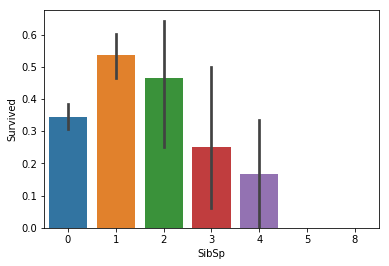

In [200]:
sns.barplot(x="SibSp", y="Survived", data=titanic_train)

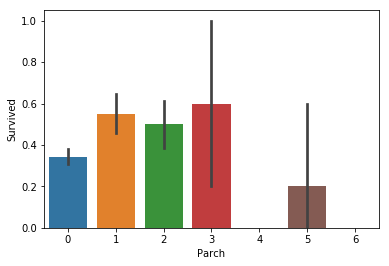

In [201]:
sns.barplot(x="Parch", y="Survived", data=titanic_train)

---
# Cleaning the Data

#### Dropping PassangerId, Cabin and Ticket
+ Unnecessary information

In [202]:
titanic_train = titanic_train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Cabin'], axis=1)
titanic_train_test = [titanic_train, titanic_test]

-------------------------------------------------------
#### Completing and scaling Age, Embarked and Fare
+ Age may have some correlation with the person's title. So the missing Age values will be filled with Median age for each title. 
+ Embarked missing values will be completed with "S" since most of passenger embarked at S.


In [203]:
for df_set in titanic_train_test:
    df_set['Title'] = df_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_train['Title'], titanic_train['Sex'])  # constructs a new df of variable counts based on the supplied arrays

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [204]:
# We can replace many titles with a more common name or classify them as Rare
# Master: too young to be called Mr.

for df_set in titanic_train_test:
    df_set['Title'] = df_set['Title'].replace(['Capt', 'Col',
                                               'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    df_set['Title'] = df_set['Title'].replace(['Lady', 'Countess', 'Sir'], 'Royal')
    df_set['Title'] = df_set['Title'].replace('Mlle', 'Miss')
    df_set['Title'] = df_set['Title'].replace('Ms', 'Miss')
    df_set['Title'] = df_set['Title'].replace('Mme', 'Mrs')

titanic_train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       20
Royal       3
Name: Title, dtype: int64

In [205]:
titanic_train[['Title', 'Age']].groupby(['Title'], as_index=False).agg(['min', 'max','median','mean'])

Age                        
          min   max median       mean
Title                                
Master   0.42  12.0    3.5   4.574167
Miss     0.75  63.0   21.0  21.845638
Mr      11.00  80.0   30.0  32.368090
Mrs     14.00  63.0   35.0  35.788991
Rare    23.00  70.0   49.0  45.894737
Royal   33.00  49.0   48.0  43.333333

In [206]:
# filling missing values with the Mean (it seems that there isn't much outliers, therefore we're using mean)
for df_set in titanic_train_test:
    df_set['Age'] = df_set['Age'].fillna(titanic_train.groupby(['Title'])['Age'].transform('mean'))

In [207]:
for df_set in titanic_train_test:
    df_set['AgeBin'] = np.ceil(df_set['Age'] / 10) #divisões de aproximadamente 10 anos
    df_set['AgeBin'].where(df_set['AgeBin'] < 7, 7, inplace=True)
    df_set['AgeBin'] = df_set['AgeBin'].astype(int)   

titanic_train['AgeBin'].value_counts()

4    291
3    266
2    115
5     87
1     68
6     42
7     22
Name: AgeBin, dtype: int64

In [208]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

In [209]:
titanic_train[['Fare', 'Pclass']].groupby('Pclass').agg(['median', 'mean'])

Fare           
         median       mean
Pclass                    
1       60.2875  84.154687
2       14.2500  20.662183
3        8.0500  13.675550

In [210]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_train.groupby(['Pclass'])['Fare'].transform('median'))

In [211]:
for df_set in titanic_train_test:
    df_set['FareBin'] = np.ceil(df_set['Fare'] / 8) #divisões de aproximadamente $8
    df_set['FareBin'].where(df_set['FareBin'] < 10, 10, inplace=True)
    df_set['FareBin'] = df_set['FareBin'].astype(int) 

titanic_train['FareBin'].value_counts()

2     244
1     226
4     131
10    102
3      64
5      35
7      28
8      18
9      16
0      15
6      12
Name: FareBin, dtype: int64

In [212]:
titanic_train = titanic_train.drop(['Name', 'Age', 'Fare'], axis=1)
titanic_test = titanic_test.drop(['Name', 'Age', 'Fare'], axis=1)
titanic_train_test = [titanic_train, titanic_test]

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null object
Title       891 non-null object
AgeBin      891 non-null int32
FareBin     891 non-null int32
dtypes: int32(2), int64(4), object(3)
memory usage: 55.8+ KB


In [213]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null object
Title          418 non-null object
AgeBin         418 non-null int32
FareBin        418 non-null int32
dtypes: int32(2), int64(4), object(3)
memory usage: 26.2+ KB


In [214]:
titanic_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBin,FareBin
0,0,3,male,1,0,S,Mr,3,1
1,1,1,female,1,0,C,Mrs,4,9
2,1,3,female,0,0,S,Miss,3,1
3,1,1,female,1,0,S,Mrs,4,7
4,0,3,male,0,0,S,Mr,4,2


---
#### Transforming categorical features to One-hot vectors

In [215]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [216]:
# Definition of the CategoricalEncoder class, copied from PR #9151.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [217]:
from sklearn.pipeline import Pipeline
enc_cat = CategoricalEncoder(encoding='onehot-dense')

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked", "Title"])),
        ("cat_encoder", enc_cat),
    ])

In [218]:
cat_dummyvalues = cat_pipeline.fit_transform(titanic_train)
cat_dummyvalues

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [219]:
cat_dummyvalues.shape

(891, 14)

In [220]:
enc_cat.categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal'], dtype=object)]

In [221]:
len(enc_cat.categories_)

4

In [222]:
col_encoded = []
cat_columns = ["Pclass", "Sex", "Embarked", "Title"]
for i in range(len(enc_cat.categories_)):
    for j in range (len(enc_cat.categories_[i])):
        col_encoded.append(str(cat_columns[i]) +"_"+ str(enc_cat.categories_[i][j]))
(col_encoded)        

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Title_Royal']

In [223]:
titanic_train_cat = pd.DataFrame(cat_dummyvalues, columns = col_encoded)
titanic_train_cat.head(10)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [224]:
titanic_train_prepared = pd.concat([titanic_train, titanic_train_cat], axis=1)
titanic_train_prepared.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBin,FareBin,Pclass_1,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal
0,0,3,male,1,0,S,Mr,3,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,female,1,0,C,Mrs,4,9,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,female,0,0,S,Miss,3,1,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,female,1,0,S,Mrs,4,7,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,male,0,0,S,Mr,4,2,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,3,male,0,0,Q,Mr,4,2,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0,1,male,0,0,S,Mr,6,7,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0,3,male,3,1,S,Master,1,3,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1,3,female,0,2,S,Mrs,3,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,2,female,1,0,C,Mrs,2,4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [225]:
cat_dummyvalues_test = cat_pipeline.transform(titanic_test)
titanic_test_cat = pd.DataFrame(cat_dummyvalues_test, columns = col_encoded)
titanic_test_prepared = pd.concat([titanic_test, titanic_test_cat], axis=1)

In [226]:
titanic_train_prepared = titanic_train_prepared.drop(["Pclass", "Sex", "Embarked", "Title"], axis=1)
titanic_test_prepared = titanic_test_prepared.drop(["Pclass", "Sex", "Embarked", "Title"], axis=1)
titanic_train_prepared.head()

,Survived,SibSp,Parch,AgeBin,FareBin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal
0,0,1,0,3,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,4,9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,3,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,4,7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,4,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [227]:
titanic_train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived        891 non-null int64
SibSp           891 non-null int64
Parch           891 non-null int64
AgeBin          891 non-null int32
FareBin         891 non-null int32
Pclass_1        891 non-null float64
Pclass_2        891 non-null float64
Pclass_3        891 non-null float64
Sex_female      891 non-null float64
Sex_male        891 non-null float64
Embarked_C      891 non-null float64
Embarked_Q      891 non-null float64
Embarked_S      891 non-null float64
Title_Master    891 non-null float64
Title_Miss      891 non-null float64
Title_Mr        891 non-null float64
Title_Mrs       891 non-null float64
Title_Rare      891 non-null float64
Title_Royal     891 non-null float64
dtypes: float64(14), int32(2), int64(3)
memory usage: 125.4 KB


---
# Training the Binary Classifier

In [228]:
X_train = titanic_train_prepared.drop("Survived", axis=1)
y_train = titanic_train_prepared["Survived"]
X_test = titanic_test_prepared.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 18), (891,), (418, 18))

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(87)

import warnings
warnings.filterwarnings('ignore')

classifier_model = [LogisticRegression(),
                    SGDClassifier(),
                    GaussianNB(),
                    RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=7, n_estimators=40),
                    LinearSVC(loss="hinge", fit_intercept=False), 
                    SVC()]


MLA = []
accuracy = []
for classifier in classifier_model:
    clf = classifier
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    #mean_scores = scores.mean()
    #scores_train = clf.score(X_train, y_train)
   
    MLA.append(clf.__class__.__name__)
    accuracy.append(scores)
   # mean.append(scores.mean())
    
    print('---')
    print(clf.__class__.__name__)
    print()
    print(str(classifier))
    print('accuracy scores: ', scores)
    print('accuracy mean: {:.4f}'.format(np.mean(scores)))
    #print('acuracy train_set: ', scores_train)
    print()
    print()      

    
#----------
#RandomForestClassifier_bestparameters ({'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 
#'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 40})

#LogisticRegression Best parameters:  {'C': 1, 'penalty': 'l2'}

#SVC Best parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

---
LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
accuracy scores:  [ 0.82122905  0.82122905  0.79775281  0.80337079  0.85875706]
accuracy mean: 0.8205


---
SGDClassifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
accuracy scores:  [ 0.74301676  0.77653631  0.69662921  0.65730337  0.82485876]
accuracy mean: 0.7397


---
GaussianNB

GaussianNB(priors=None)
accuracy scores:  [ 0.77653631  0.81005587  0.83707865  0.76966292  0.82485876]
accuracy mean: 0.8036


---
RandomForest

--
# Evaluating the Test Set

+ After fine tuning some algorithms (below), Random Forest Classifier performed the best

In [232]:
from sklearn.ensemble import RandomForestClassifier

best_classifier = RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=4, 
                                         min_samples_split=7, n_estimators=40)

best_classifier.fit(X_train, y_train)
final_prediction = best_classifier.predict(X_test)

In [239]:
submission = pd.DataFrame({'PassengerId': titanic_test_prepared['PassengerId'],
                           'Survived': final_prediction})

submission.to_csv('TitanicSubmission.csv', index=False)

submission.shape

(418, 2)

In [240]:
from sklearn.svm import SVC
best_classifier = SVC()

best_classifier.fit(X_train, y_train)
final_prediction = best_classifier.predict(X_test)

In [241]:
submission = pd.DataFrame({'PassengerId': titanic_test_prepared['PassengerId'],
                           'Survived': final_prediction})

submission.to_csv('TitanicSubmissionSVC.csv', index=False)

submission.shape

(418, 2)